In [493]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plot

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [2]:
train_set = pd.read_csv('/Users/monicasandramensah/Desktop/Capstone - Flu/training_set_features.csv')

In [3]:
train_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
train_set.shape

(26707, 36)

In [5]:
test_set = pd.read_csv('/Users/monicasandramensah/Desktop/Capstone - Flu/test_set_features.csv')

In [6]:
test_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [7]:
test_set.shape

(26708, 36)

In [8]:
#Both training and test data sets have 36 rows of data but train set has one less respondent

In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
train_set_labels = pd.read_csv('/Users/monicasandramensah/Desktop/Capstone - Flu/training_set_labels.csv')

In [12]:
train_set_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


# Data Dictionary

- respondent_id: A unique and random identifier. The remaining 35 features are described below.

- For all binary variables: 0 means  No and 1 means Yes.

 - h1n1_concern: Level of concern about the H1N1 flu.
    0 = Not at all concerned; 
    1 = Not very concerned; 
    2 = Somewhat concerned; 
    3 = Very concerned.
    
 - h1n1_knowledge: Level of knowledge about H1N1 flu.
    0 = No knowledge; 
    1 = A little knowledge; 
    2 = A lot of knowledge.

 - behavioral_antiviral_meds: Has taken antiviral medications. (binary)

 - behavioral_avoidance: Has avoided close contact with others with flu-like symptoms. (binary)

 - behavioral_face_mask: Has bought a face mask. (binary)

 - behavioral_wash_hands: Has frequently washed hands or used hand sanitizer. (binary)

 - behavioral_large_gatherings: Has reduced time at large gatherings. (binary)

 - behavioral_outside_home: Has reduced contact with people outside of own household. (binary)

 - behavioral_touch_face: Has avoided touching eyes, nose, or mouth. (binary)

 - doctor_recc_h1n1: H1N1 flu vaccine was recommended by doctor. (binary)

 - doctor_recc_seasonal: Seasonal flu vaccine was recommended by doctor. (binary)

 - chronic_med_condition: Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

 - child_under_6_months: Has regular close contact with a child under the age of six months. (binary)

 - health_worker: Is a healthcare worker. (binary)

 - health_insurance: Has health insurance. (binary)

 - opinion_h1n1_vacc_effective: Respondent's opinion about H1N1 vaccine effectiveness.
    1 = Not at all effective; 
    2 = Not very effective; 
    3 = Don't know; 
    4 = Somewhat effective; 
    5 = Very effective.
    
 - opinion_h1n1_risk: Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
    1 = Very Low; 
    2 = Somewhat low; 
    3 = Don't know; 
    4 = Somewhat high; 
    5 = Very high.
    
 - opinion_h1n1_sick_from_vacc: Respondent's worry of getting sick from taking H1N1 vaccine.
    1 = Not at all worried; 
    2 = Not very worried; 
    3 = Don't know; 
    4 = Somewhat worried; 
    5 = Very worried.
   
  - opinion_seas_vacc_effective: Respondent's opinion about seasonal flu vaccine effectiveness.
    1 = Not at all effective; 
    2 = Not very effective; 
    3 = Don't know; 
    4 = Somewhat effective; 
    5 = Very effective.
    
 - opinion_seas_risk: Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
    1 = Very Low; 
    2 = Somewhat low; 
    3 = Don't know; 
    4 = Somewhat high; 
    5 = Very high.
    
 - opinion_seas_sick_from_vacc: Respondent's worry of getting sick from taking seasonal flu vaccine.
    1 = Not at all worried; 
    2 = Not very worried; 
    3 = Don't know; 
    4 = Somewhat worried; 
    5 = Very worried.
    
 - age_group: Age group of respondent.

 - education: Self-reported education level.

 - race: Race of respondent.

 - sex: Sex of respondent.

 - income_poverty: Household annual income of respondent with respect to 2008 Census poverty thresholds.

 - marital_status: Marital status of respondent.

 - rent_or_own: Housing situation of respondent.

 - employment_status: Employment status of respondent.

 - hhs_geo_region: Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

 - census_msa: Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

 - household_adults: Number of other adults in household, top-coded to 3.

 - household_children: Number of children in household, top-coded to 3.

 - employment_industry: Type of industry respondent is employed in. Values are represented as short random character strings.

 - employment_occupation: Type of occupation of respondent. Values are represented as short random character strings.

In [13]:
#Used the training data to perform EDA

In [14]:
h1n1_con_test = test_set.h1n1_concern.value_counts(dropna=False).sort_index()
h1n1_con_test

0.0     3199
1.0     8158
2.0    10743
3.0     4523
NaN       85
Name: h1n1_concern, dtype: int64

In [15]:
h1n1_con_train = train_set.h1n1_concern.value_counts(dropna=False).sort_index()
h1n1_con_train

0.0     3296
1.0     8153
2.0    10575
3.0     4591
NaN       92
Name: h1n1_concern, dtype: int64

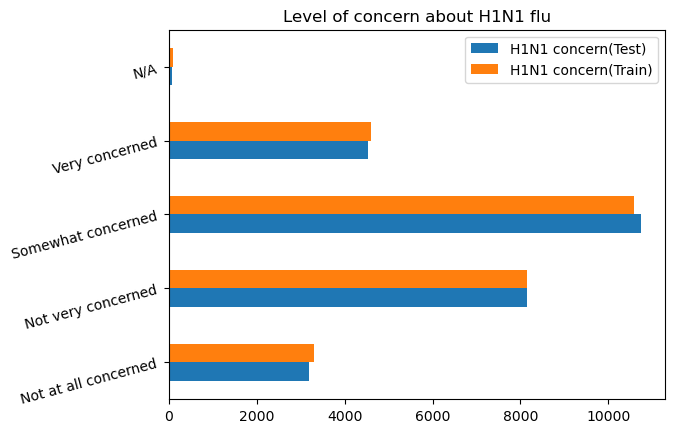

In [16]:
data = {"H1N1 concern(Test)":h1n1_con_test,

        "H1N1 concern(Train)":h1n1_con_train,

        };

index     = ["Not at all concerned", "Not very concerned", "Somewhat concerned", "Very concerned", "N/A"];
# Dictionary loaded into a DataFrame

dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Level of concern about H1N1 flu");
plot.show(block=True);

In [17]:
h1n1_know_test = test_set.h1n1_knowledge.value_counts(dropna=False).sort_index()
h1n1_know_test

0.0     2442
1.0    14629
2.0     9515
NaN      122
Name: h1n1_knowledge, dtype: int64

In [18]:
h1n1_know_train = train_set.h1n1_knowledge.value_counts(dropna=False).sort_index()
h1n1_know_train

0.0     2506
1.0    14598
2.0     9487
NaN      116
Name: h1n1_knowledge, dtype: int64

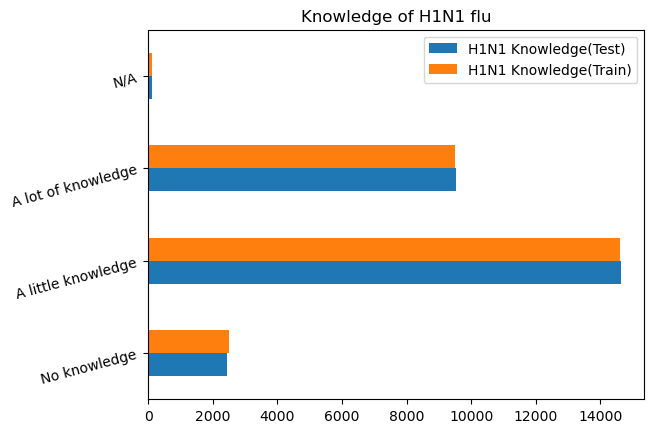

In [19]:
data = {"H1N1 Knowledge(Test)":h1n1_know_test,

        "H1N1 Knowledge(Train)":h1n1_know_train,

        };

index     = ["No knowledge", "A little knowledge", "A lot of knowledge", "N/A"];
# Dictionary loaded into a DataFrame

dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Knowledge of H1N1 flu");
plot.show(block=True);

In [20]:
antiviral_train = train_set.behavioral_antiviral_meds.value_counts(dropna=False)
antiviral_train

0.0    25335
1.0     1301
NaN       71
Name: behavioral_antiviral_meds, dtype: int64

In [21]:
antiviral_test = test_set.behavioral_antiviral_meds.value_counts(dropna=False)
antiviral_test

0.0    25307
1.0     1322
NaN       79
Name: behavioral_antiviral_meds, dtype: int64

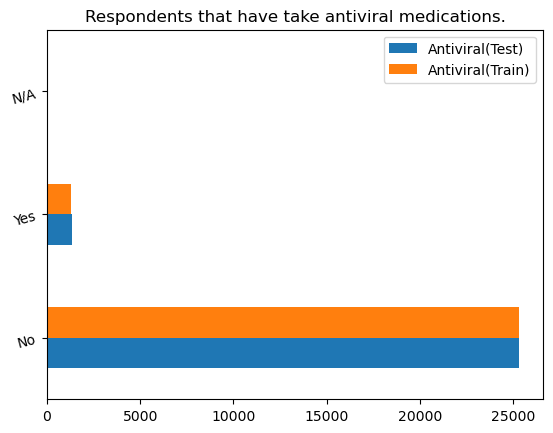

In [22]:
data = {"Antiviral(Test)":antiviral_test,

        "Antiviral(Train)":antiviral_train,

        };

index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame

dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have take antiviral medications.");
plot.show(block=True);

In [23]:
avoidance_train = train_set.behavioral_avoidance.value_counts(dropna=False).sort_index()
avoidance_train

0.0     7271
1.0    19228
NaN      208
Name: behavioral_avoidance, dtype: int64

In [24]:
avoidance_test = test_set.behavioral_avoidance.value_counts(dropna=False).sort_index()
avoidance_test

0.0     7159
1.0    19336
NaN      213
Name: behavioral_avoidance, dtype: int64

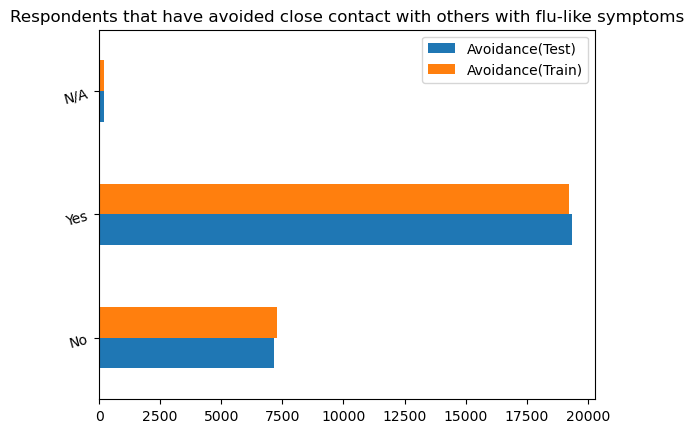

In [25]:
data = {"Avoidance(Test)":avoidance_test,

        "Avoidance(Train)":avoidance_train,

        };

index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame

dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have avoided close contact with others with flu-like symptoms");
plot.show(block=True);

In [26]:
face_mask_train = train_set.behavioral_face_mask.value_counts(dropna=False)
face_mask_train

0.0    24847
1.0     1841
NaN       19
Name: behavioral_face_mask, dtype: int64

In [27]:
face_mask_test = test_set.behavioral_face_mask.value_counts(dropna=False)
face_mask_test

0.0    24840
1.0     1849
NaN       19
Name: behavioral_face_mask, dtype: int64

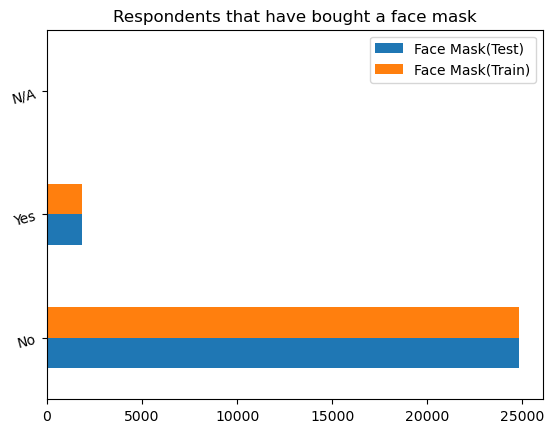

In [28]:
data = {"Face Mask(Test)":face_mask_test,

        "Face Mask(Train)":face_mask_train,

        };

index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame

dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have bought a face mask");
plot.show(block=True);

In [29]:
wash_hands_train = train_set.behavioral_wash_hands.value_counts(dropna=False).sort_index()
wash_hands_train

0.0     4650
1.0    22015
NaN       42
Name: behavioral_wash_hands, dtype: int64

In [30]:
wash_hands_test = test_set.behavioral_wash_hands.value_counts(dropna=False).sort_index()
wash_hands_test

0.0     4638
1.0    22030
NaN       40
Name: behavioral_wash_hands, dtype: int64

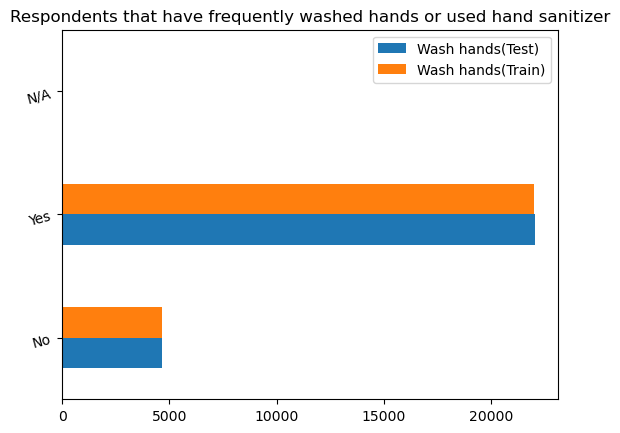

In [31]:
data = {"Wash hands(Test)":wash_hands_test,

        "Wash hands(Train)":wash_hands_train,

        };

index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame

dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have frequently washed hands or used hand sanitizer");
plot.show(block=True);

In [32]:
gatherings_train = train_set.behavioral_large_gatherings.value_counts(dropna=False)
gatherings_train

0.0    17073
1.0     9547
NaN       87
Name: behavioral_large_gatherings, dtype: int64

In [33]:
gatherings_test = test_set.behavioral_large_gatherings.value_counts(dropna=False)
gatherings_test

0.0    17273
1.0     9363
NaN       72
Name: behavioral_large_gatherings, dtype: int64

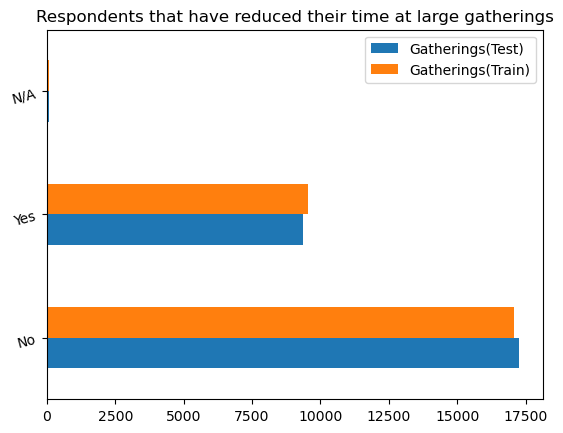

In [34]:
data = {"Gatherings(Test)":gatherings_test,

        "Gatherings(Train)":gatherings_train,

        };

index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame

dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have reduced their time at large gatherings");
plot.show(block=True);

In [35]:
outside_train = train_set.behavioral_outside_home.value_counts(dropna=False)
outside_train

0.0    17644
1.0     8981
NaN       82
Name: behavioral_outside_home, dtype: int64

In [36]:
outside_test = test_set.behavioral_outside_home.value_counts(dropna=False)
outside_test

0.0    17647
1.0     8979
NaN       82
Name: behavioral_outside_home, dtype: int64

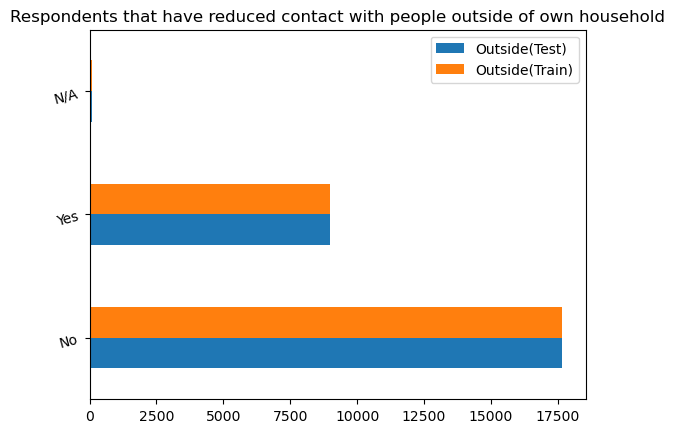

In [37]:
data = {"Outside(Test)":outside_test,

        "Outside(Train)":outside_train,

        };

index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame

dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have reduced contact with people outside of own household");
plot.show(block=True);

In [38]:
touch_face_train = train_set.behavioral_touch_face.value_counts(dropna=False)
touch_face_train

1.0    18001
0.0     8578
NaN      128
Name: behavioral_touch_face, dtype: int64

In [39]:
touch_face_test = train_set.behavioral_touch_face.value_counts(dropna=False)
touch_face_test

1.0    18001
0.0     8578
NaN      128
Name: behavioral_touch_face, dtype: int64

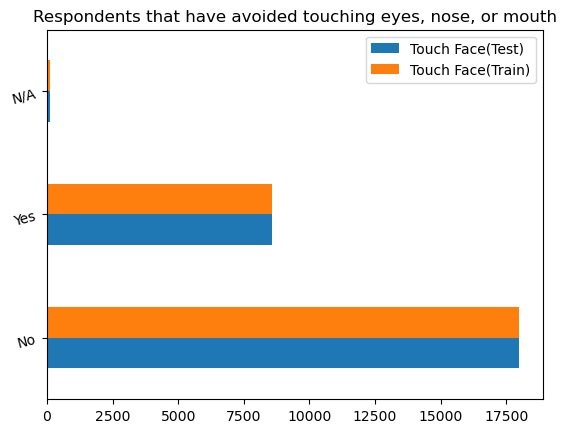

In [40]:
data = {"Touch Face(Test)":touch_face_test,

        "Touch Face(Train)":touch_face_train,

        };
index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have avoided touching eyes, nose, or mouth");
plot.show(block=True);

In [41]:
recc_h1n1_train = train_set.doctor_recc_h1n1.value_counts(dropna=False)
recc_h1n1_train

0.0    19139
1.0     5408
NaN     2160
Name: doctor_recc_h1n1, dtype: int64

In [42]:
recc_h1n1_test = test_set.doctor_recc_h1n1.value_counts(dropna=False)
recc_h1n1_test

0.0    19082
1.0     5466
NaN     2160
Name: doctor_recc_h1n1, dtype: int64

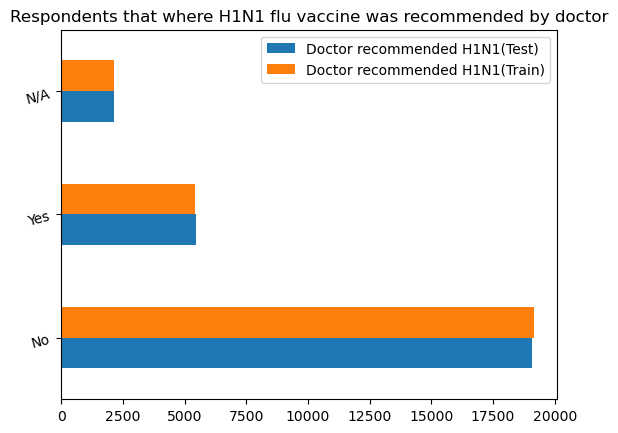

In [43]:
data = {"Doctor recommended H1N1(Test)":recc_h1n1_test,

        "Doctor recommended H1N1(Train)":recc_h1n1_train,

        };
index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that where H1N1 flu vaccine was recommended by doctor");
plot.show(block=True);

In [44]:
recc_seas_train = train_set.doctor_recc_seasonal.value_counts(dropna=False)
recc_seas_train

0.0    16453
1.0     8094
NaN     2160
Name: doctor_recc_seasonal, dtype: int64

In [45]:
recc_seas_test = test_set.doctor_recc_seasonal.value_counts(dropna=False)
recc_seas_test

0.0    16360
1.0     8188
NaN     2160
Name: doctor_recc_seasonal, dtype: int64

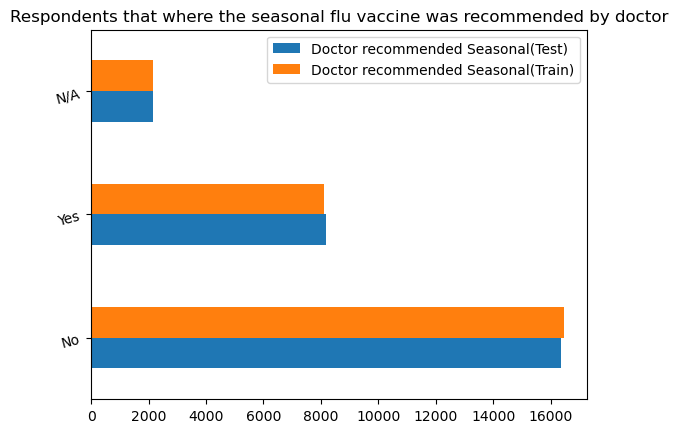

In [46]:
data = {"Doctor recommended Seasonal(Test)":recc_seas_test,

        "Doctor recommended Seasonal(Train)":recc_seas_train,

        };
index     = ["No", "Yes", "N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that where the seasonal flu vaccine was recommended by doctor");
plot.show(block=True);

In [47]:
c_med_cond_train = train_set.chronic_med_condition.value_counts(dropna=False)
c_med_cond_train

0.0    18446
1.0     7290
NaN      971
Name: chronic_med_condition, dtype: int64

In [48]:
c_med_cond_test = test_set.chronic_med_condition.value_counts(dropna=False)
c_med_cond_test

0.0    18532
1.0     7244
NaN      932
Name: chronic_med_condition, dtype: int64

In [49]:
#Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, 
#a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, 
#or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness.

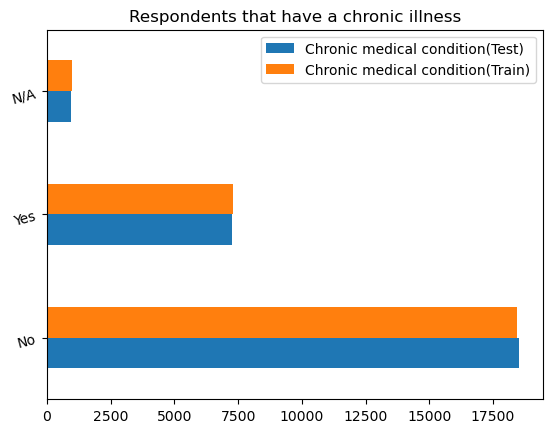

In [50]:
data = {"Chronic medical condition(Test)":c_med_cond_test,

        "Chronic medical condition(Train)":c_med_cond_train,

        };
index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have a chronic illness");
plot.show(block=True);

In [51]:
c_un_6m_train = train_set.child_under_6_months.value_counts(dropna=False)
c_un_6m_train

0.0    23749
1.0     2138
NaN      820
Name: child_under_6_months, dtype: int64

In [52]:
c_un_6m_test = test_set.child_under_6_months.value_counts(dropna=False)
c_un_6m_test

0.0    23660
1.0     2235
NaN      813
Name: child_under_6_months, dtype: int64

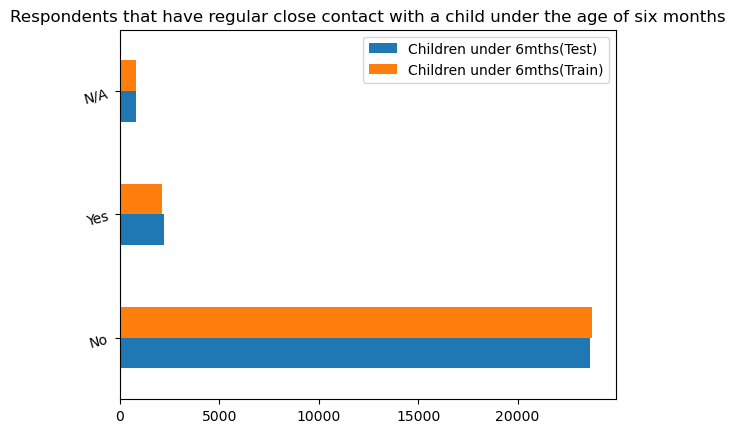

In [53]:
data = {"Children under 6mths(Test)":c_un_6m_test,

        "Children under 6mths(Train)":c_un_6m_train,

        };
index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have regular close contact with a child under the age of six months");
plot.show(block=True);

In [54]:
health_worker_train = train_set.health_worker.value_counts(dropna=False)
health_worker_train

0.0    23004
1.0     2899
NaN      804
Name: health_worker, dtype: int64

In [55]:
health_worker_test = test_set.health_worker.value_counts(dropna=False)
health_worker_test

0.0    23029
1.0     2890
NaN      789
Name: health_worker, dtype: int64

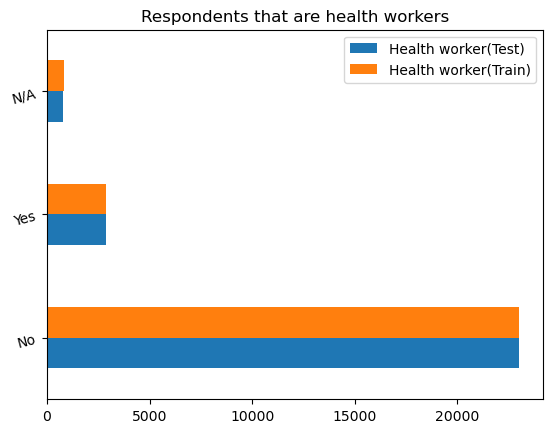

In [56]:
data = {"Health worker(Test)":health_worker_test,

        "Health worker(Train)":health_worker_train,

        };
index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that are health workers");
plot.show(block=True);

In [215]:
h_ins_train = train_set.health_insurance.value_counts(dropna=False).sort_index()
h_ins_train

0.0     1736
1.0    12697
NaN    12274
Name: health_insurance, dtype: int64

In [216]:
h_ins_test = test_set.health_insurance.value_counts(dropna=False).sort_index()
h_ins_test

0.0     1623
1.0    12857
NaN    12228
Name: health_insurance, dtype: int64

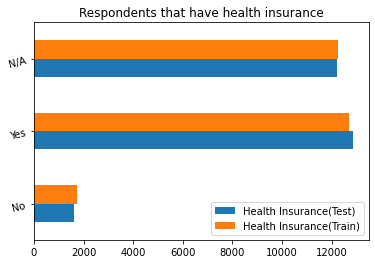

In [217]:
data = {"Health Insurance(Test)":h_ins_test,

        "Health Insurance(Train)":h_ins_train,

        };
index     = ["No", "Yes","N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondents that have health insurance");
plot.show(block=True);

In [60]:
h_eff_train = train_set.opinion_h1n1_vacc_effective.value_counts(dropna=False).sort_index()
h_eff_train

1.0      886
2.0     1858
3.0     4723
4.0    11683
5.0     7166
NaN      391
Name: opinion_h1n1_vacc_effective, dtype: int64

In [61]:
h_eff_test = test_set.opinion_h1n1_vacc_effective.value_counts(dropna=False).sort_index()
h_eff_test

1.0      921
2.0     1800
3.0     4790
4.0    11734
5.0     7065
NaN      398
Name: opinion_h1n1_vacc_effective, dtype: int64

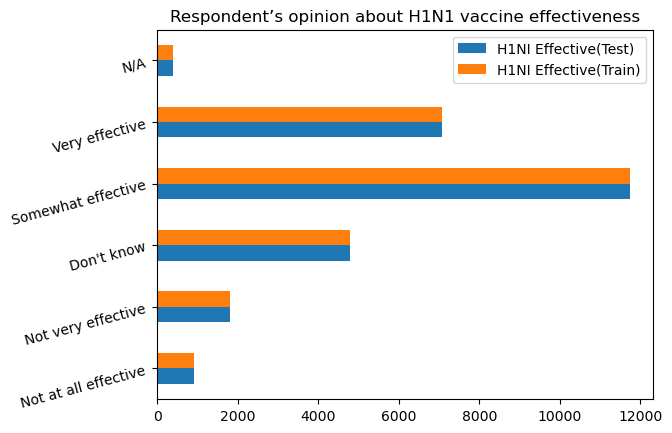

In [62]:
data = {"H1NI Effective(Test)":h_eff_test,

        "H1NI Effective(Train)":h_eff_test,

        };
index     = ["Not at all effective", "Not very effective", "Don't know", "Somewhat effective", "Very effective","N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondent’s opinion about H1N1 vaccine effectiveness");
plot.show(block=True);

In [63]:
h1n1_risk_train = train_set.opinion_h1n1_risk.value_counts(dropna=False).sort_index()
h1n1_risk_train

1.0    8139
2.0    9919
3.0    1117
4.0    5394
5.0    1750
NaN     388
Name: opinion_h1n1_risk, dtype: int64

In [64]:
h1n1_risk_test = test_set.opinion_h1n1_risk.value_counts(dropna=False).sort_index()
h1n1_risk_test

1.0    8207
2.0    9942
3.0    1230
4.0    5265
5.0    1684
NaN     380
Name: opinion_h1n1_risk, dtype: int64

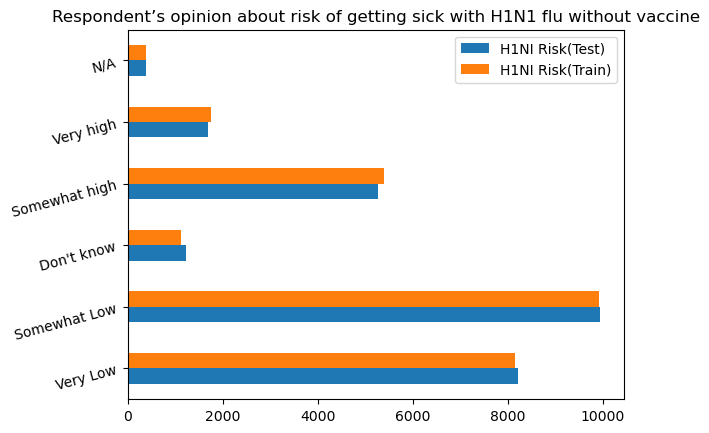

In [65]:
data = {"H1NI Risk(Test)":h1n1_risk_test,

        "H1NI Risk(Train)":h1n1_risk_train,

        };
index     = ["Very Low", "Somewhat Low", "Don't know", "Somewhat high", "Very high","N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondent’s opinion about risk of getting sick with H1N1 flu without vaccine");
plot.show(block=True);

In [66]:
h1n1_sick_from_vacc_train = train_set.opinion_h1n1_sick_from_vacc.value_counts(dropna=False).sort_index()
h1n1_sick_from_vacc_train

1.0    8998
2.0    9129
3.0     148
4.0    5850
5.0    2187
NaN     395
Name: opinion_h1n1_sick_from_vacc, dtype: int64

In [67]:
h1n1_sick_from_vacc_test = test_set.opinion_h1n1_sick_from_vacc.value_counts(dropna=False).sort_index()
h1n1_sick_from_vacc_test

1.0    8935
2.0    9177
3.0     161
4.0    5910
5.0    2150
NaN     375
Name: opinion_h1n1_sick_from_vacc, dtype: int64

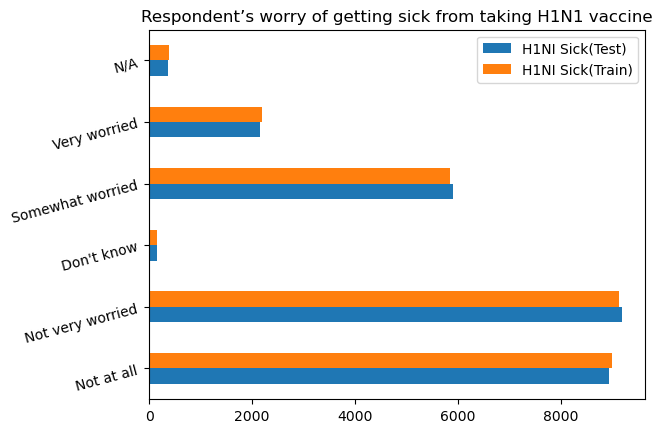

In [68]:
data = {"H1NI Sick(Test)":h1n1_sick_from_vacc_test,

        "H1NI Sick(Train)":h1n1_sick_from_vacc_train,

        };
index = ["Not at all", "Not very worried", "Don't know", "Somewhat worried", "Very worried", "N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondent’s worry of getting sick from taking H1N1 vaccine");
plot.show(block=True);

In [69]:
seas_vacc_eff_train = train_set.opinion_seas_vacc_effective.value_counts(dropna=False).sort_index()
seas_vacc_eff_train

1.0     1221
2.0     2206
3.0     1216
4.0    11629
5.0     9973
NaN      462
Name: opinion_seas_vacc_effective, dtype: int64

In [70]:
seas_vacc_eff_test = test_set.opinion_seas_vacc_effective.value_counts(dropna=False).sort_index()
seas_vacc_eff_test

1.0     1152
2.0     2284
3.0     1321
4.0    11502
5.0     9997
NaN      452
Name: opinion_seas_vacc_effective, dtype: int64

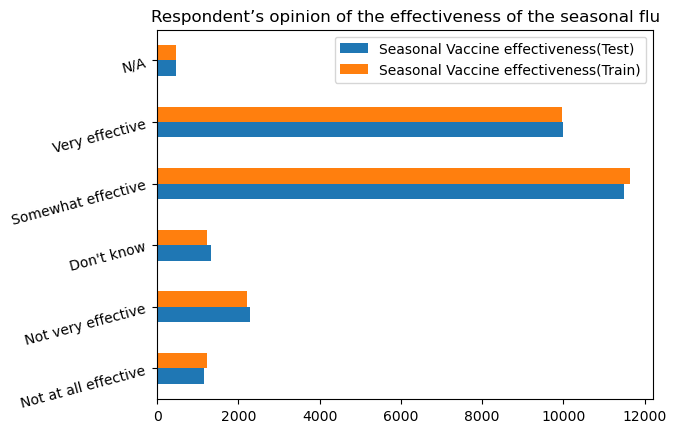

In [71]:
data = {"Seasonal Vaccine effectiveness(Test)":seas_vacc_eff_test,

        "Seasonal Vaccine effectiveness(Train)":seas_vacc_eff_train,

        };
index = ["Not at all effective", "Not very effective", "Don't know", "Somewhat effective", "Very effective", "N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondent’s opinion of the effectiveness of the seasonal flu");
plot.show(block=True);

In [72]:
seas_risk_train = train_set.opinion_seas_risk.value_counts(dropna=False).sort_index()
seas_risk_train 

1.0    5974
2.0    8954
3.0     677
4.0    7630
5.0    2958
NaN     514
Name: opinion_seas_risk, dtype: int64

In [73]:
seas_risk_test =  test_set.opinion_seas_risk.value_counts(dropna=False).sort_index()
seas_risk_test

1.0    5939
2.0    9072
3.0     736
4.0    7609
5.0    2853
NaN     499
Name: opinion_seas_risk, dtype: int64

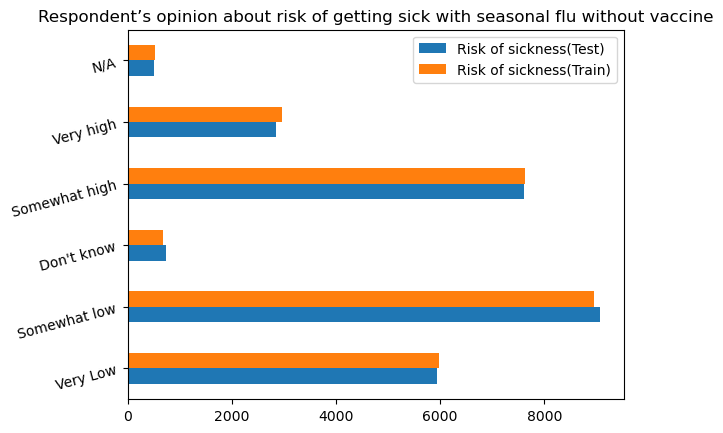

In [74]:
data = {"Risk of sickness(Test)":seas_risk_test,

        "Risk of sickness(Train)":seas_risk_train,

        };
index = ["Very Low", "Somewhat low", "Don't know", "Somewhat high", "Very high", "N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondent’s opinion about risk of getting sick with seasonal flu without vaccine");
plot.show(block=True);

In [75]:
train_set.opinion_seas_sick_from_vacc.value_counts(dropna=False).sort_index()

1.0    11870
2.0     7633
3.0       94
4.0     4852
5.0     1721
NaN      537
Name: opinion_seas_sick_from_vacc, dtype: int64

In [76]:
test_set.opinion_seas_sick_from_vacc.value_counts(dropna=False).sort_index()

1.0    11577
2.0     7789
3.0       92
4.0     4947
5.0     1782
NaN      521
Name: opinion_seas_sick_from_vacc, dtype: int64

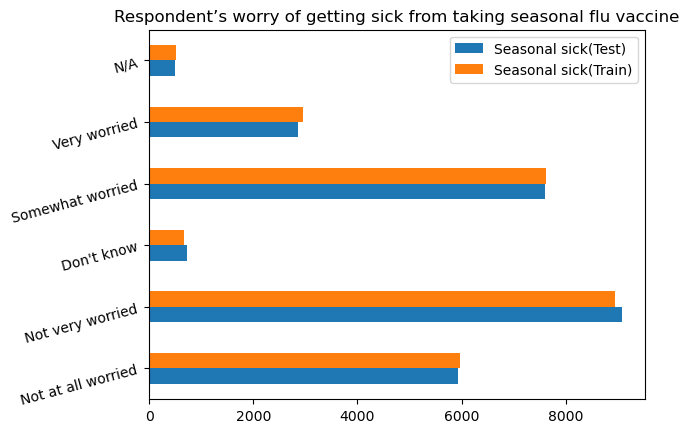

In [77]:
data = {"Seasonal sick(Test)":seas_risk_test,

        "Seasonal sick(Train)":seas_risk_train,

        };
index = ["Not at all worried", "Not very worried", "Don't know", "Somewhat worried", "Very worried", "N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Respondent’s worry of getting sick from taking seasonal flu vaccine");
plot.show(block=True);

In [78]:
age_train = train_set.age_group.value_counts(normalize=True).sort_index()
age_train

18 - 34 Years    0.195267
35 - 44 Years    0.144082
45 - 54 Years    0.196128
55 - 64 Years    0.208297
65+ Years        0.256225
Name: age_group, dtype: float64

In [79]:
age_test = test_set.age_group.value_counts(normalize=True).sort_index()
age_test

18 - 34 Years    0.195971
35 - 44 Years    0.148645
45 - 54 Years    0.196832
55 - 64 Years    0.207017
65+ Years        0.251535
Name: age_group, dtype: float64

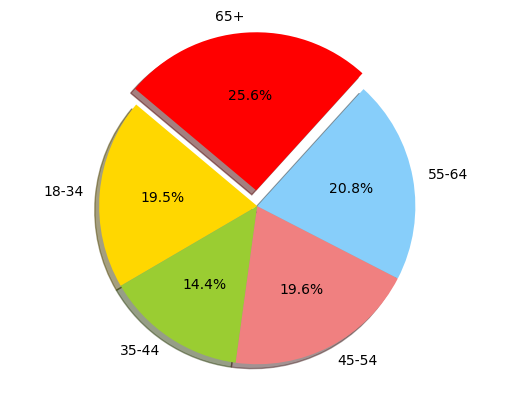

In [80]:
labels = '18-34', '35-44', '45-54', '55-64','65+'
sizes = age_train
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0, 0, 0, 0,0.1) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [81]:
education_train = train_set.education.value_counts(normalize=True).sort_index()
education_train

12 Years            0.229130
< 12 Years          0.093399
College Graduate    0.399091
Some College        0.278379
Name: education, dtype: float64

In [82]:
education_test = test_set.education.value_counts(normalize=True).sort_index()
education_test

12 Years            0.225248
< 12 Years          0.092328
College Graduate    0.402593
Some College        0.279831
Name: education, dtype: float64

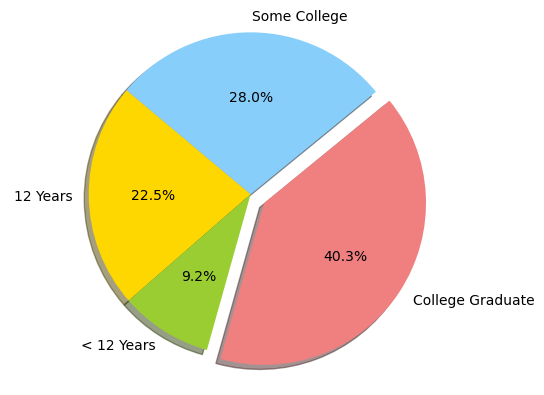

In [83]:
labels = '12 Years', '< 12 Years', 'College Graduate', 'Some College '
sizes = education_test
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [84]:
race_train = train_set.race.value_counts(normalize=True).sort_index()
race_train

Black                0.079305
Hispanic             0.065713
Other or Multiple    0.060359
White                0.794623
Name: race, dtype: float64

In [85]:
race_test = test_set.race.value_counts(normalize=True).sort_index()
race_test

Black                0.081399
Hispanic             0.063764
Other or Multiple    0.057286
White                0.797551
Name: race, dtype: float64

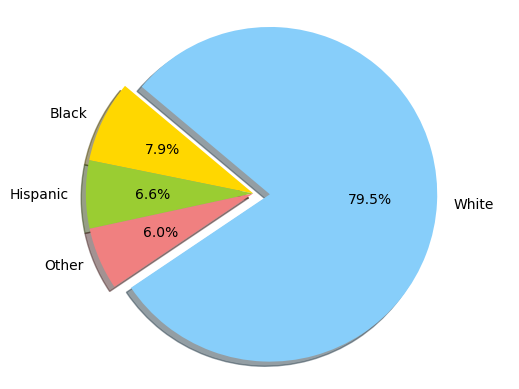

In [86]:
labels = 'Black', 'Hispanic', 'Other', 'White'
sizes = race_train
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.0, 0, 0, 0.1) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [87]:
sex_train = train_set.sex.value_counts(normalize=True)
sex_train

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

In [88]:
sex_test = test_set.sex.value_counts(normalize=True)
sex_test

Female    0.592856
Male      0.407144
Name: sex, dtype: float64

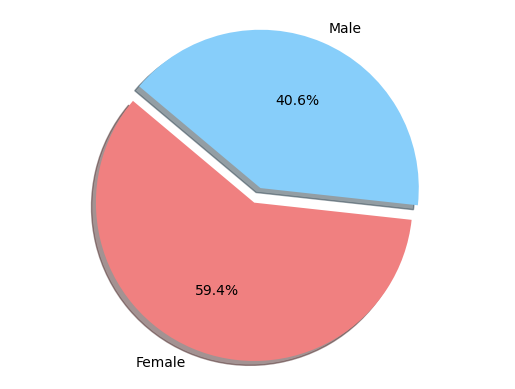

In [89]:
labels = 'Female', 'Male'
sizes = sex_train
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [90]:
poverty_train = train_set.income_poverty.value_counts(normalize=True).sort_index()
poverty_train

<= $75,000, Above Poverty    0.573371
> $75,000                    0.305600
Below Poverty                0.121029
Name: income_poverty, dtype: float64

In [91]:
poverty_test = test_set.income_poverty.value_counts(normalize=True).sort_index()
poverty_test

<= $75,000, Above Poverty    0.575165
> $75,000                    0.308991
Below Poverty                0.115844
Name: income_poverty, dtype: float64

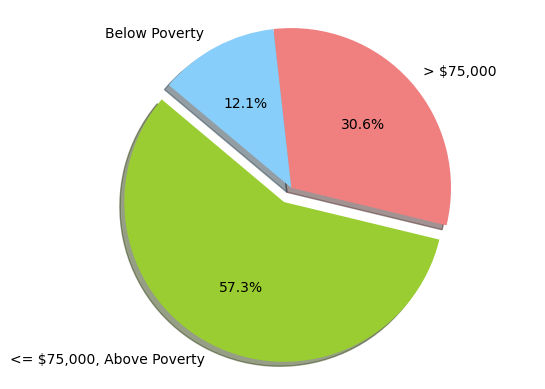

In [92]:
labels = '<= $75,000, Above Poverty', '> $75,000 ', 'Below Poverty '
sizes = poverty_train
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [93]:
marital_train = train_set.marital_status.value_counts(normalize=True)
marital_train

Married        0.535792
Not Married    0.464208
Name: marital_status, dtype: float64

In [94]:
marital_test = test_set.marital_status.value_counts(normalize=True)
marital_test

Married        0.536215
Not Married    0.463785
Name: marital_status, dtype: float64

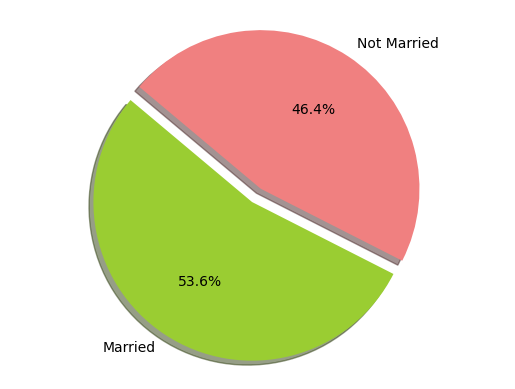

In [95]:
labels = 'Married', 'Not Married'
sizes = marital_test
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [96]:
renting_train = train_set.rent_or_own.value_counts(normalize=True)
renting_train

Own     0.759619
Rent    0.240381
Name: rent_or_own, dtype: float64

In [97]:
renting_test = test_set.rent_or_own.value_counts(normalize=True)
renting_test
# whats the percentage of people in the US that owen their own home?

Own     0.758795
Rent    0.241205
Name: rent_or_own, dtype: float64

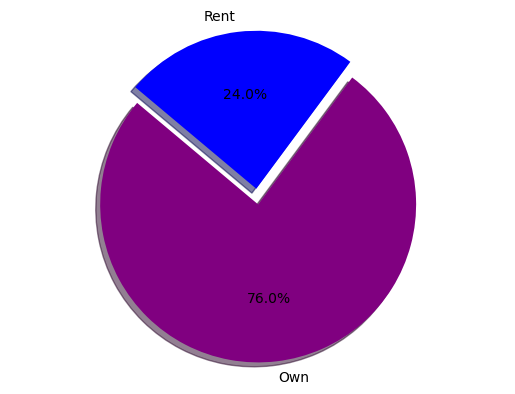

In [98]:
labels = 'Own', 'Rent'
sizes = renting_train
colors = ['purple', 'blue']
explode = (0.1, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [99]:
employment_train = train_set.employment_status.value_counts(normalize=True)
employment_train

Employed              0.537157
Not in Labor Force    0.405284
Unemployed            0.057558
Name: employment_status, dtype: float64

In [100]:
employment_test = test_set.employment_status.value_counts(normalize=True)
employment_test

Employed              0.540159
Not in Labor Force    0.399889
Unemployed            0.059952
Name: employment_status, dtype: float64

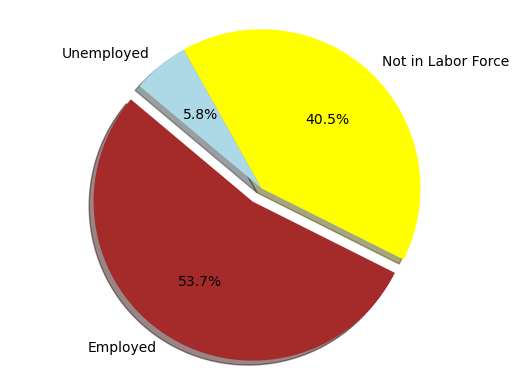

In [101]:
labels = 'Employed', 'Not in Labor Force', 'Unemployed'
sizes = employment_train
colors = ['brown', 'yellow', 'lightblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [102]:
region_train = train_set.hhs_geo_region.value_counts(dropna=False).sort_index()
region_train
#barplot

atmpeygn    2033
bhuqouqj    2846
dqpwygqj    1126
fpwskwrf    3265
kbazzjca    2858
lrircsnp    2078
lzgpxyit    4297
mlyzmhmf    2243
oxchjgsf    2859
qufhixun    3102
Name: hhs_geo_region, dtype: int64

In [103]:
region_test = test_set.hhs_geo_region.value_counts(dropna=False).sort_index()
region_test

atmpeygn    1986
bhuqouqj    2867
dqpwygqj    1151
fpwskwrf    3241
kbazzjca    2844
lrircsnp    2022
lzgpxyit    4363
mlyzmhmf    2183
oxchjgsf    2987
qufhixun    3064
Name: hhs_geo_region, dtype: int64

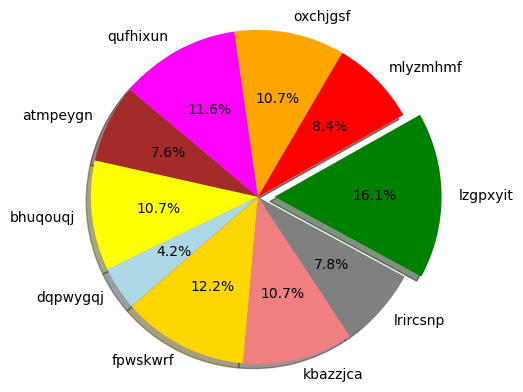

In [104]:
labels = 'atmpeygn', 'bhuqouqj', 'dqpwygqj','fpwskwrf','kbazzjca','lrircsnp','lzgpxyit','mlyzmhmf','oxchjgsf','qufhixun'
sizes = region_train
colors = ['brown', 'yellow', 'lightblue', 'gold', 'lightcoral', 'grey', 'green','red', 'orange', 'magenta']
explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [105]:
census_train = train_set.census_msa.value_counts(dropna=False)
census_train

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [106]:
census_test = test_set.census_msa.value_counts(dropna=False)
census_test

MSA, Not Principle  City    11926
MSA, Principle City          7805
Non-MSA                      6977
Name: census_msa, dtype: int64

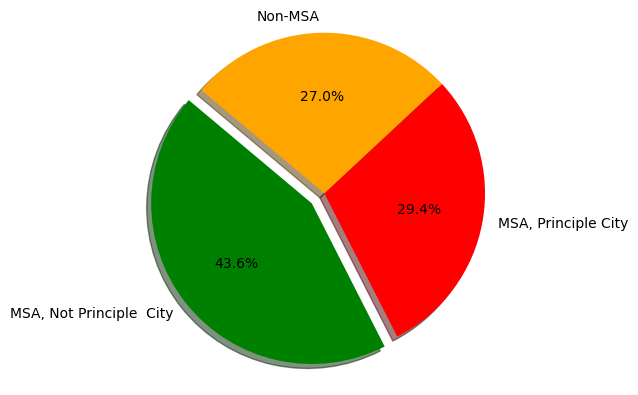

In [107]:
labels = 'MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA'
sizes = census_train
colors =  ['green','red', 'orange']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [108]:
adults_train = train_set.household_adults.value_counts(dropna=False).sort_index()
adults_train

0.0     8056
1.0    14474
2.0     2803
3.0     1125
NaN      249
Name: household_adults, dtype: int64

In [109]:
adults_test = test_set.household_adults.value_counts(dropna=False).sort_index()
adults_test

0.0     7943
1.0    14533
2.0     2870
3.0     1137
NaN      225
Name: household_adults, dtype: int64

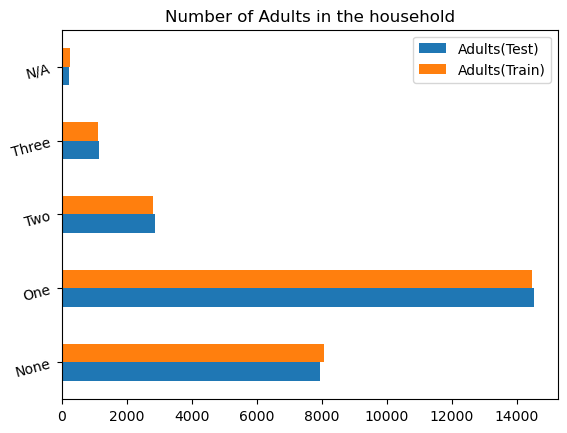

In [110]:
data = {"Adults(Test)":adults_test,

        "Adults(Train)":adults_train,

        };
index = ["None", "One", "Two", "Three", "N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Number of Adults in the household");
plot.show(block=True);

In [111]:
children_train = train_set.household_children.value_counts(dropna=False).sort_index()
children_train

0.0    18672
1.0     3175
2.0     2864
3.0     1747
NaN      249
Name: household_children, dtype: int64

In [112]:
children_test = train_set.household_children.value_counts(dropna=False).sort_index()
children_test

0.0    18672
1.0     3175
2.0     2864
3.0     1747
NaN      249
Name: household_children, dtype: int64

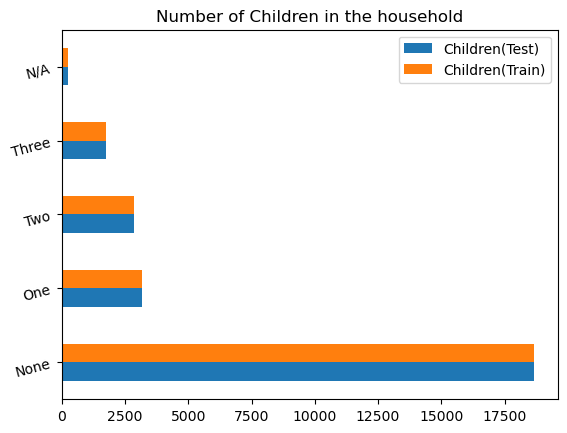

In [113]:
data = {"Children(Test)":children_test,

        "Children(Train)":children_train,

        };
index = ["None", "One", "Two", "Three", "N/A"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="Number of Children in the household");
plot.show(block=True);

In [114]:
industry_train = train_set.employment_industry.value_counts(dropna=False)
industry_train
#Barplot

NaN         13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

In [115]:
industry_test = test_set.employment_industry.value_counts(dropna=False)
industry_test

NaN         13275
fcxhlnwr     2484
wxleyezf     1805
ldnlellj     1224
pxcmvdjn     1078
arjwrbjb      885
xicduogh      847
atmlpfrs      822
mfikgejo      649
vjjrobsf      567
rucpziij      538
xqicxuve      527
saaquncn      338
cfqqtusy      304
nduyfdeo      292
mcubkhph      262
dotnnunm      220
wlfvacwt      212
haxffmxo      160
msuufmds      132
phxvnwax       81
qnlwzans        6
Name: employment_industry, dtype: int64

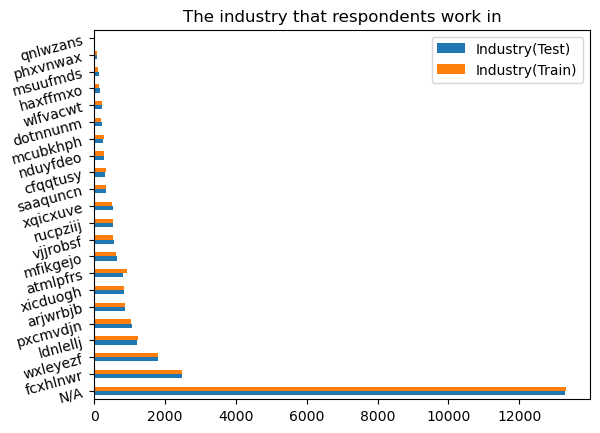

In [116]:
data = {"Industry(Test)":industry_test,

        "Industry(Train)":industry_train,

        };
index = ["N/A", "fcxhlnwr", "wxleyezf", "ldnlellj", "pxcmvdjn", "arjwrbjb", "xicduogh", "atmlpfrs","mfikgejo", "vjjrobsf", "rucpziij", "xqicxuve","saaquncn","cfqqtusy","nduyfdeo", "mcubkhph","dotnnunm","wlfvacwt", "haxffmxo", "msuufmds", "phxvnwax", "qnlwzans"];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="The industry that respondents work in");
plot.show(block=True);

In [117]:
occupation_train = train_set.employment_occupation.value_counts(dropna=False).sort_index()
occupation_train

bxpfxfdn      331
ccgxvspp      341
cmhcxjea     1247
dcjcmpih      148
dlvbwzss      227
emcorrxb     1270
haliazsg      296
hfxkjkmi      766
hodpvpew      208
kldqjyjy      469
mxkfnird     1509
oijqvulv      344
pvmttkik       98
qxajmpny      548
rcertsgn      276
tfqavkke      388
ukymxvdu      372
uqqtjvyb      452
vlluhbov      354
xgwztkwe     1082
xqwwgdyp      485
xtkaffoo     1778
xzmlyyjv      248
NaN         13470
Name: employment_occupation, dtype: int64

In [118]:
occupation_test = test_set.employment_occupation.value_counts(dropna=False).sort_index()
occupation_test

bxpfxfdn      331
ccgxvspp      368
cmhcxjea     1224
dcjcmpih      161
dlvbwzss      245
emcorrxb     1284
haliazsg      300
hfxkjkmi      725
hodpvpew      253
kldqjyjy      446
mxkfnird     1561
oijqvulv      346
pvmttkik      108
qxajmpny      499
rcertsgn      297
tfqavkke      402
ukymxvdu      329
uqqtjvyb      501
vlluhbov      325
xgwztkwe     1138
xqwwgdyp      475
xtkaffoo     1748
xzmlyyjv      216
NaN         13426
Name: employment_occupation, dtype: int64

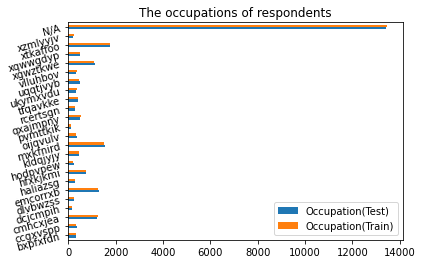

In [218]:
data = {"Occupation(Test)":occupation_test,

        "Occupation(Train)":occupation_train,

        };
index = ["bxpfxfdn", "ccgxvspp", "cmhcxjea", "dcjcmpih", "dlvbwzss", 
         "emcorrxb", "haliazsg", "hfxkjkmi","hodpvpew","kldqjyjy", 
         "mxkfnird", "oijqvulv", "pvmttkik","qxajmpny","rcertsgn",
         "tfqavkke","ukymxvdu","uqqtjvyb","vlluhbov", "xgwztkwe", 
         "xqwwgdyp", "xtkaffoo", "xzmlyyjv", "N/A",];
# Dictionary loaded into a DataFrame
dataFrame       = pd.DataFrame(data=data);
dataFrame.index = index;
dataFrame.plot.barh(rot=15,title="The occupations of respondents");
plot.show(block=True);

In [120]:
train_set_labels[(train_set_labels.seasonal_vaccine == 1)]

,respondent_id,h1n1_vaccine,seasonal_vaccine
1,1,0,1
3,3,0,1
7,7,1,1
10,10,1,1
11,11,1,1
...,...,...,...
26694,26694,0,1
26696,26696,1,1
26698,26698,0,1
26700,26700,0,1


In [121]:
train_set[(train_set_labels.seasonal_vaccine == 1)]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,4.0,2.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,26694,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,wxleyezf,emcorrxb
26696,26696,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,4.0,4.0,5.0,5.0,4.0,45 - 54 Years,Some College,White,Male,NaN,Married,Own,Employed,bhuqouqj,"MSA, Principle City",1.0,0.0,saaquncn,mxkfnird
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,dotnnunm,mxkfnird
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,5.0,5.0,4.0,5.0,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,NaN,NaN


In [122]:
# Filter to those who have received the h1n1 vaccine 
h1n1 = train_set_labels[train_set_labels.h1n1_vaccine == 1]

# Filter to those that have received both 
vac = h1n1[h1n1.seasonal_vaccine == 1]
vac
#only 4697 people got both vaccines, 5674 got the h1n1 and 12,435 for the seasonal

,respondent_id,h1n1_vaccine,seasonal_vaccine
7,7,1,1
10,10,1,1
11,11,1,1
16,16,1,1
26,26,1,1
...,...,...,...
26678,26678,1,1
26683,26683,1,1
26685,26685,1,1
26688,26688,1,1


In [123]:
train_set_labels[train_set_labels.seasonal_vaccine == 1]

,respondent_id,h1n1_vaccine,seasonal_vaccine
1,1,0,1
3,3,0,1
7,7,1,1
10,10,1,1
11,11,1,1
...,...,...,...
26694,26694,0,1
26696,26696,1,1
26698,26698,0,1
26700,26700,0,1


In [124]:
#How many didnt get any vaccines at all 
non_s = train_set_labels[train_set_labels.seasonal_vaccine == 0]
non_s 

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
2,2,0,0
4,4,0,0
5,5,0,0
6,6,0,0
...,...,...,...
26701,26701,0,0
26702,26702,0,0
26703,26703,0,0
26705,26705,0,0


In [125]:
none = non_s[non_s.h1n1_vaccine == 1]
none
#977 didnt get any vaccine at all 

,respondent_id,h1n1_vaccine,seasonal_vaccine
31,31,1,0
33,33,1,0
47,47,1,0
121,121,1,0
162,162,1,0
...,...,...,...
26622,26622,1,0
26628,26628,1,0
26651,26651,1,0
26668,26668,1,0


In [126]:
#joined the two dataframes to learn more about the repondents 
df_virus = pd.merge(train_set_labels, train_set, on="respondent_id")
df_virus

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [127]:
len(df_virus['respondent_id'].unique())

26707

In [128]:
# Filter to those who have received the h1n1 vaccine 
h1n1 = df_virus[df_virus.h1n1_vaccine == 1]

# Filter to those that have received both 
vac = h1n1[h1n1.seasonal_vaccine == 1]
vac.count()
#only 4697 people got both vaccine

respondent_id                  4697
h1n1_vaccine                   4697
seasonal_vaccine               4697
h1n1_concern                   4683
h1n1_knowledge                 4676
behavioral_antiviral_meds      4673
behavioral_avoidance           4668
behavioral_face_mask           4693
behavioral_wash_hands          4692
behavioral_large_gatherings    4684
behavioral_outside_home        4686
behavioral_touch_face          4682
doctor_recc_h1n1               4550
doctor_recc_seasonal           4550
chronic_med_condition          4564
child_under_6_months           4586
health_worker                  4588
health_insurance               3613
opinion_h1n1_vacc_effective    4638
opinion_h1n1_risk              4631
opinion_h1n1_sick_from_vacc    4637
opinion_seas_vacc_effective    4628
opinion_seas_risk              4621
opinion_seas_sick_from_vacc    4624
age_group                      4697
education                      4503
race                           4697
sex                         

# Document your project goals (revise from your initial pitch)
in the data provided there are is only confirmation of who received vaccines for 977 of the respondents. The goal is to predict the outcome of the other respondents 

# - Articulate “Specific aim”
The aim is to predict the outcome of the other respondents

# - Outline proposed methods and models
The models I intend to use are as follows
MultiOutputClassifier
Kneighbours Classifier -
Kmeans - Clustering 
Useful when you want to understand similarity and relationships among the categorical data. It creates a set of groups, which we call ‘Clusters’, based on how the categories score on a set of given variables.

confusion matrix 4x4 - to evaluate
precision scores
 
decision Trees and ensemble methods

In [489]:
train_set_labels['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [490]:
train_set_labels['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [129]:
# - Define risks & assumptions
#Majority if not all of the healthworkers received vaccinations as this maybe required through their line of work
#

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt

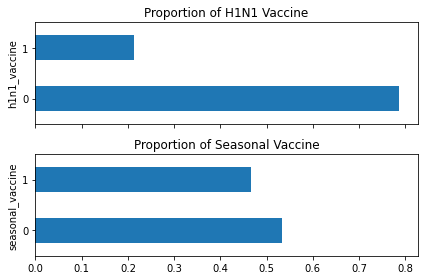

In [131]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = train_set.shape[0]

(train_set_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(train_set_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [132]:
pd.crosstab(
    train_set_labels["h1n1_vaccine"], 
    train_set_labels["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [492]:
# Phi Coefficient is the same as Pearson for two binary variables
(train_set_labels["h1n1_vaccine"]
     .corr(train_set_labels["seasonal_vaccine"], method="pearson")
).round(2)

0.38

In [134]:
counts = (df_virus[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


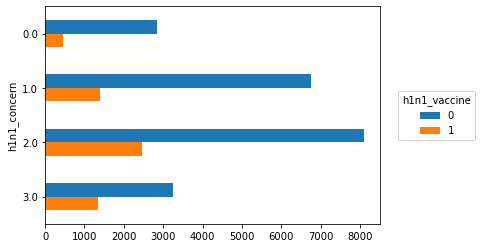

In [135]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

In [136]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [137]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


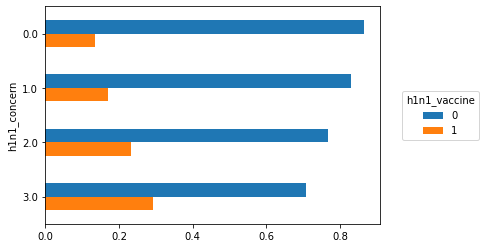

In [138]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

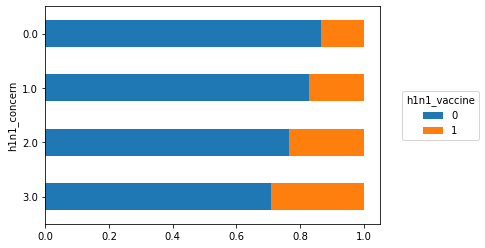

In [139]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [140]:

def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (df_virus[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

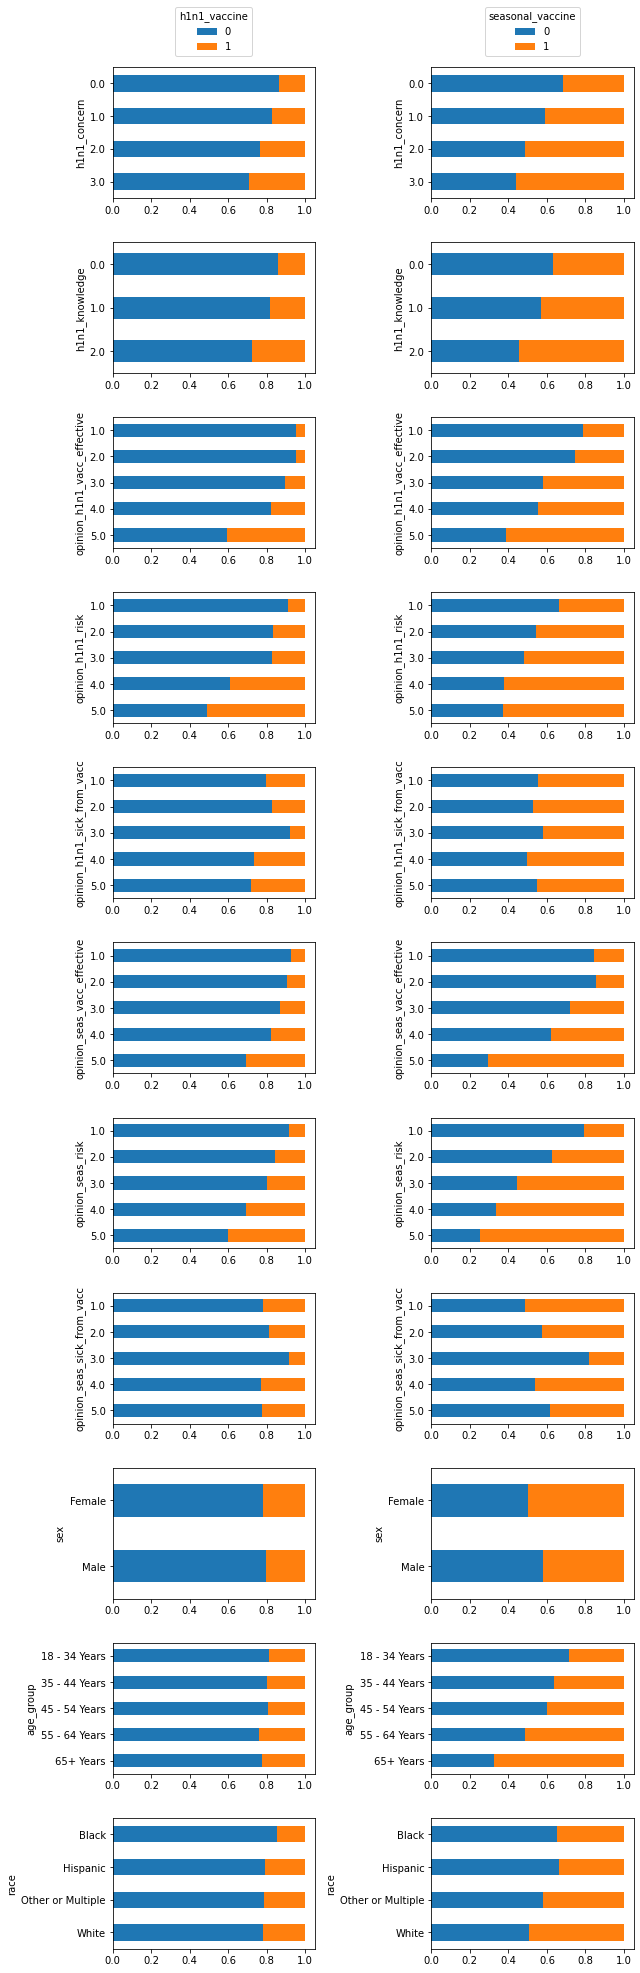

In [141]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df_virus, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df_virus, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [397]:
T_1 = train_set.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

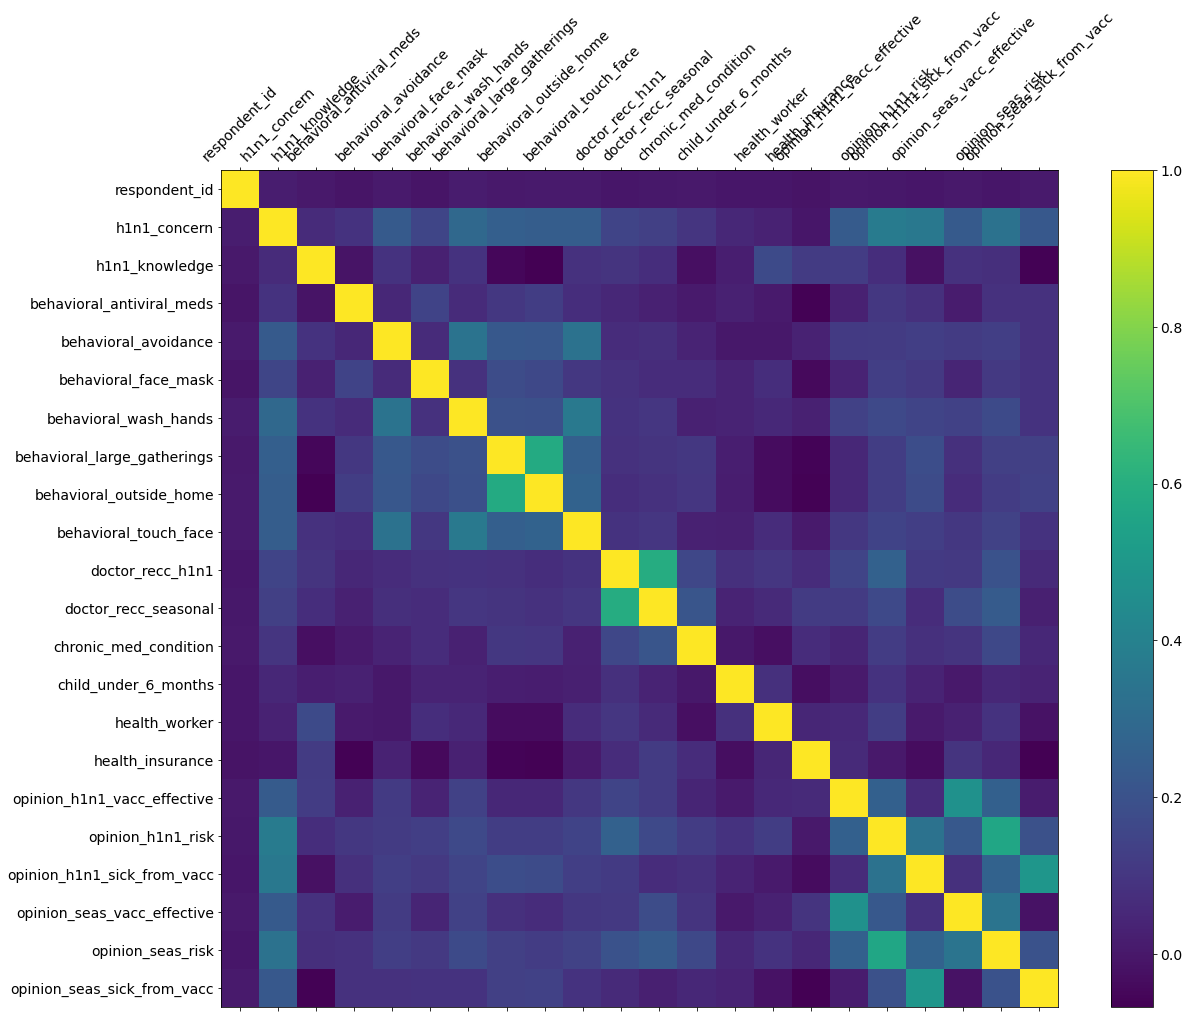

In [460]:
f = plt.figure(figsize=(19, 15))
plt.matshow(T_1.corr(), fignum=f.number)
plt.xticks(range(T_1.shape[1]), T_1.columns, fontsize=14, rotation=45)
plt.yticks(range(T_1.shape[1]), T_1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [143]:
#Decision has been taken to dummify the training data in order to consider if there is a correlation between any of the features of the training data 

In [498]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [512]:
T_2 = train_set.iloc[:,[22,23,24,25,26,27,28,29,30,31,32,33,34,35]]
T_2

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [510]:
T_2.race.value_counts(normalize=True)

White                0.794623
Black                0.079305
Hispanic             0.065713
Other or Multiple    0.060359
Name: race, dtype: float64

In [513]:
T_2_dum = pd.get_dummies(T_2 )
T_2_dum 

,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26703,1.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26704,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26705,1.

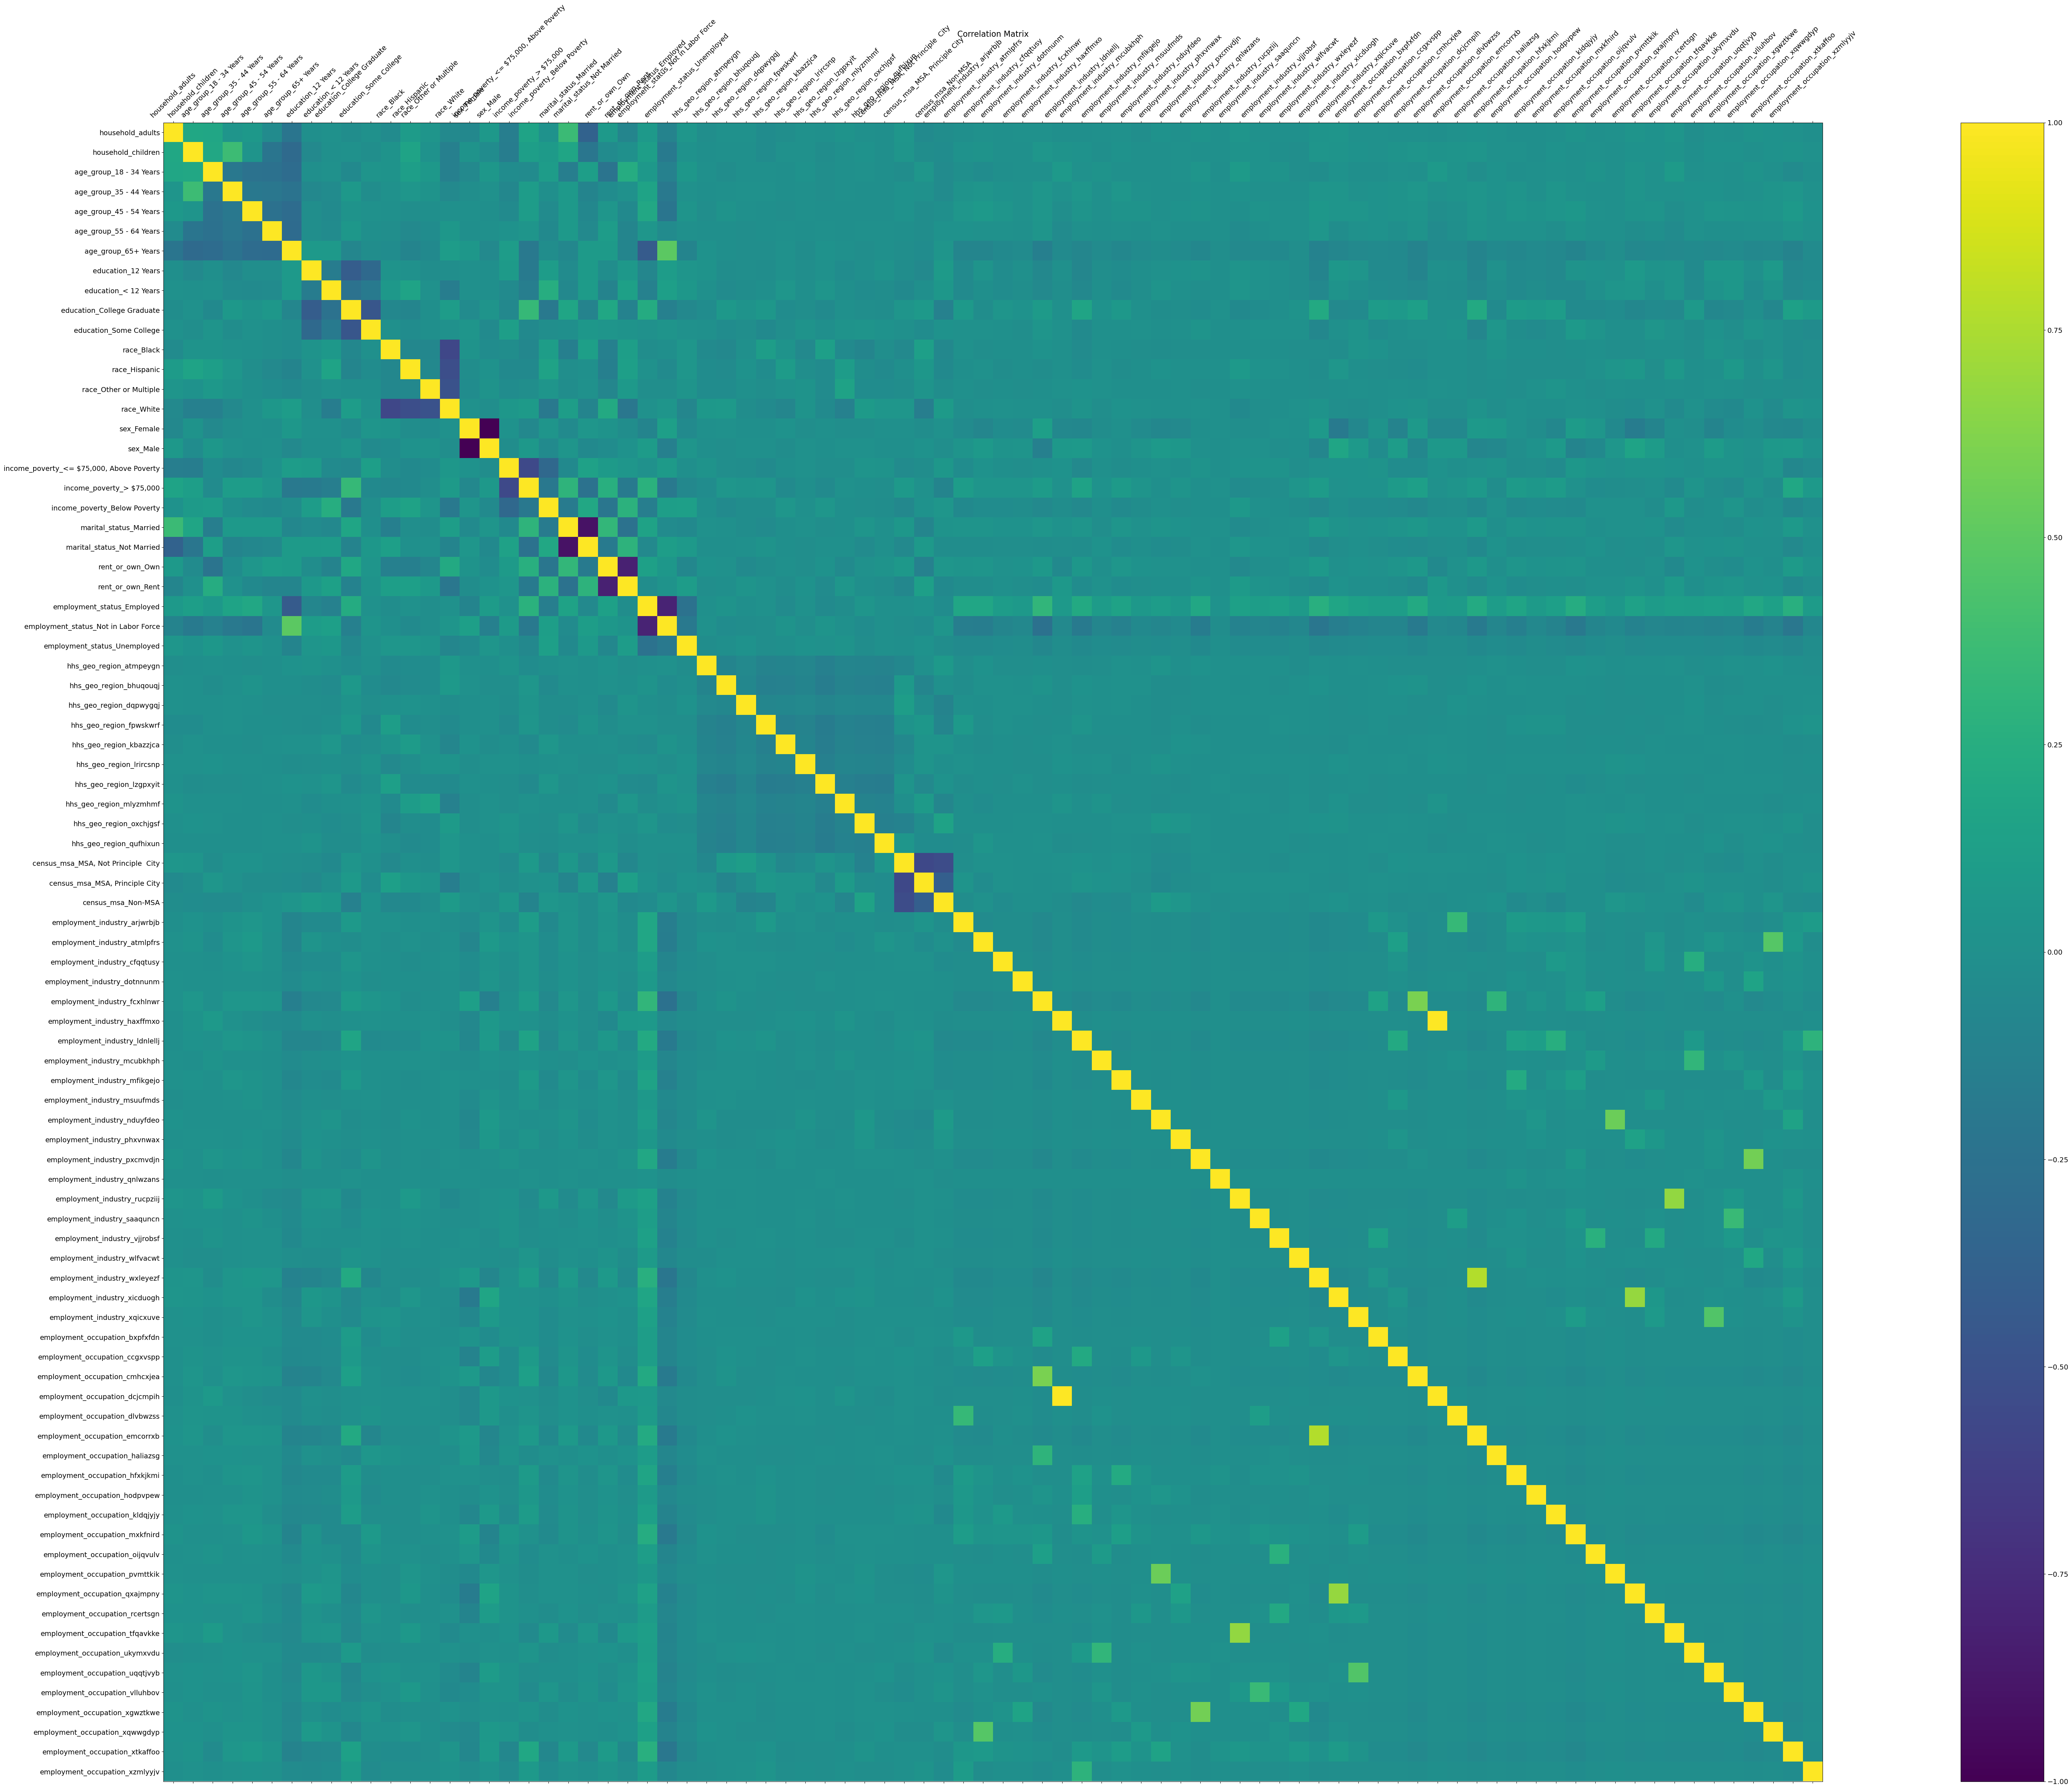

In [514]:
f = plt.figure(figsize=(100, 60))
plt.matshow(T_2_dum.corr(), fignum=f.number)
plt.xticks(range(T_2_dum.shape[1]), T_2_dum.columns, fontsize=14, rotation=45)
plt.yticks(range(T_2_dum.shape[1]), T_2_dum.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6

In [148]:
train_set.dtypes != "object"

respondent_id                   True
h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
m

In [149]:
numeric_cols = train_set.columns[train_set.dtypes != "object"].values
print(numeric_cols)

['respondent_id' 'h1n1_concern' 'h1n1_knowledge'
 'behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'doctor_recc_h1n1'
 'doctor_recc_seasonal' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'health_insurance' 'opinion_h1n1_vacc_effective'
 'opinion_h1n1_risk' 'opinion_h1n1_sick_from_vacc'
 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children']


In [150]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [151]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [152]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [153]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_lar...
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_ch

In [160]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train_set,
    train_set_labels[['h1n1_vaccine', 'seasonal_vaccine']],
    test_size=0.33,
    shuffle=True,
    stratify=train_set_labels[['h1n1_vaccine', 'seasonal_vaccine']],
    random_state=RANDOM_SEED
)

In [165]:
X_train.shape

(17893, 36)

In [162]:
y_eval.shape

(8814, 2)

In [166]:
train_set_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [349]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# probabilities are required, not labels
probabilities = full_pipeline.predict_proba(X_eval)
probabilities

[array([[0.70771285, 0.29228715],
        [0.90255764, 0.09744236],
        [0.84341643, 0.15658357],
        ...,
        [0.92337447, 0.07662553],
        [0.89676143, 0.10323857],
        [0.92787705, 0.07212295]]),
 array([[0.52188767, 0.47811233],
        [0.62116712, 0.37883288],
        [0.36319715, 0.63680285],
        ...,
        [0.85930746, 0.14069254],
        [0.78112873, 0.21887127],
        [0.15109758, 0.84890242]])]

In [458]:
probabilities_train = full_pipeline.predict_proba(X_train)
probabilities_eval = full_pipeline.predict_proba(X_eval)

In [168]:
#preds = full_pipeline.predict_proba(X_eval)
#preds

[array([[0.70771285, 0.29228715],
        [0.90255764, 0.09744236],
        [0.84341643, 0.15658357],
        ...,
        [0.92337447, 0.07662553],
        [0.89676143, 0.10323857],
        [0.92787705, 0.07212295]]),
 array([[0.52188767, 0.47811233],
        [0.62116712, 0.37883288],
        [0.36319715, 0.63680285],
        ...,
        [0.85930746, 0.14069254],
        [0.78112873, 0.21887127],
        [0.15109758, 0.84890242]])]

In [169]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [351]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
6728,0.292287,0.478112
16516,0.097442,0.378833
3106,0.156584,0.636803
16981,0.660995,0.856430
19111,0.283296,0.773547


In [171]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

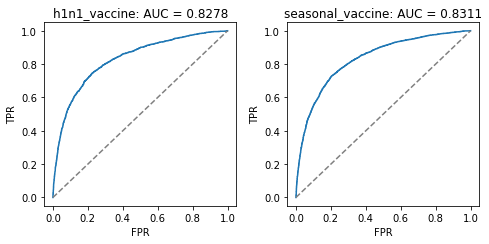

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [173]:
y_eval.shape

(8814, 2)

In [174]:
y_eval = y_eval[["h1n1_vaccine", "seasonal_vaccine"]]

In [175]:
y_preds.shape

(8814, 2)

In [257]:
roc_auc_score(y_eval, y_preds)

0.829418614969788

In [318]:
%%time 

full_pipeline.fit(X_train, y_train)

None   # So we don't print out the whole pipeline representation

CPU times: user 192 ms, sys: 51.9 ms, total: 244 ms
Wall time: 200 ms


In [324]:
test_probas = full_pipeline.predict_proba(X_eval)
test_probas

[array([[0.70771285, 0.29228715],
        [0.90255764, 0.09744236],
        [0.84341643, 0.15658357],
        ...,
        [0.92337447, 0.07662553],
        [0.89676143, 0.10323857],
        [0.92787705, 0.07212295]]),
 array([[0.52188767, 0.47811233],
        [0.62116712, 0.37883288],
        [0.36319715, 0.63680285],
        ...,
        [0.85930746, 0.14069254],
        [0.78112873, 0.21887127],
        [0.15109758, 0.84890242]])]

In [361]:
predictions_train = pd.DataFrame(full_pipeline.predict(X_train), columns=y_train.columns, index=y_train.index)
predictions_eval = pd.DataFrame(full_pipeline.predict(X_eval), columns=y_eval.columns, index=y_eval.index)

In [362]:
predictions_eval

,h1n1_vaccine,seasonal_vaccine
6728,0,0
16516,0,0
3106,0,1
16981,1,1
19111,0,1
...,...,...
6876,0,0
5834,1,1
13478,0,0
18399,0,0


In [337]:
full_pipeline.predict

<function sklearn.pipeline.Pipeline.predict(self, X, **predict_params)>

In [338]:
print(full_pipeline.predict(X_eval))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [340]:
probabilities_train

[array([[0.89769826, 0.10230174],
        [0.82114052, 0.17885948],
        [0.79477655, 0.20522345],
        ...,
        [0.94730468, 0.05269532],
        [0.92350792, 0.07649208],
        [0.89143989, 0.10856011]]),
 array([[0.24596294, 0.75403706],
        [0.62753659, 0.37246341],
        [0.42607993, 0.57392007],
        ...,
        [0.84369521, 0.15630479],
        [0.36576616, 0.63423384],
        [0.86393663, 0.13606337]])]

In [341]:
probabilities_eval

[array([[0.70771285, 0.29228715],
        [0.90255764, 0.09744236],
        [0.84341643, 0.15658357],
        ...,
        [0.92337447, 0.07662553],
        [0.89676143, 0.10323857],
        [0.92787705, 0.07212295]]),
 array([[0.52188767, 0.47811233],
        [0.62116712, 0.37883288],
        [0.36319715, 0.63680285],
        ...,
        [0.85930746, 0.14069254],
        [0.78112873, 0.21887127],
        [0.15109758, 0.84890242]])]

In [342]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics

In [280]:
y_eval

,h1n1_vaccine,seasonal_vaccine
6728,1,0
16516,0,0
3106,0,1
16981,1,1
19111,0,1
...,...,...
6876,0,0
5834,1,1
13478,0,0
18399,0,0


In [308]:
y_preds

,h1n1_vaccine,seasonal_vaccine
6728,0.292287,0.478112
16516,0.097442,0.378833
3106,0.156584,0.636803
16981,0.660995,0.856430
19111,0.283296,0.773547
...,...,...
6876,0.095778,0.252775
5834,0.729713,0.833221
13478,0.076626,0.140693
18399,0.103239,0.218871


In [452]:
 p_ev = full_pipeline.predict(X_eval)

In [453]:
p_ev[0,:]

array([0, 0])

In [451]:
h1n1_confusion_matrix = metrics.confusion_matrix(y_eval["h1n1_vaccine"], p_ev[0,:], labels=[1,0])
print(h1n1_confusion_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [8814, 2]

In [445]:
seas_confusion_matrix = metrics.confusion_matrix(y_eval["seasonal_vaccine"], predictions_eval[:,1], labels=[1,0])
print(seas_confusion_matrix)

TypeError: '(slice(None, None, None), 1)' is an invalid key

In [461]:
#didmt both
y_e = y_eval.apply(lambda x: np.allclose(x, np.array([0,0]))*1,axis=1)

In [462]:
#didnt H1N1 but had Seasonal
y_e1 = y_eval.apply(lambda x: np.allclose(x, np.array([0,1]))*1,axis=1)

In [463]:
#has H1N1 but didnt Seasonal
y_e2 = y_eval.apply(lambda x: np.allclose(x, np.array([1,0]))*1,axis=1)

In [464]:
#had both
y_e3 = y_eval.apply(lambda x: np.allclose(x, np.array([1,1]))*1,axis=1)

In [465]:
#had both
y_p = predictions_eval.apply(lambda x: np.allclose(x, np.array([0,0]))*1,axis=1)

In [466]:
#Had H1N1 but no Seasonal
y_p1 = predictions_eval.apply(lambda x: np.allclose(x, np.array([0,1]))*1,axis=1)

In [467]:
#no H1N1 but had Seasonal
y_p2 = predictions_eval.apply(lambda x: np.allclose(x, np.array([1,0]))*1,axis=1)

In [468]:
#No didnt have either
y_p3 = predictions_eval.apply(lambda x: np.allclose(x, np.array([1,1]))*1,axis=1)

In [469]:
np.sum(y_e == y_p)

6652

In [470]:
np.sum((y_e == 1) & (y_p == 1))#TP

3542

In [471]:
np.sum((y_e1 == 1) & (y_p1 == 1))

1507

In [472]:
np.sum((y_e2 == 1) & (y_p2 == 1))

48

In [473]:
np.sum((y_e3 == 1) & (y_p3 == 1))

675

In [474]:
np.sum((y_e == 0) & (y_p == 0))#TN

3110

In [475]:
np.sum((y_e1 == 0) & (y_p1 == 0))

5008

In [476]:
np.sum((y_e2 == 0) & (y_p2 == 0))

8406

In [477]:
np.sum((y_e3 == 0) & (y_p3 == 0))

6876

In [478]:
#np.sum((y_e1 == 1) & (y_p1 == 0))

In [479]:
#np.sum((y_e1 == 0) & (y_p1 == 1))

In [480]:
#np.sum((y_e2 == 0) & (y_p2 == 0))

In [481]:
#np.sum((y_e2 == 1) & (y_p2 == 0))

In [482]:
#np.sum((y_e2 == 0) & (y_p2 == 1))

In [483]:
#np.sum((y_e3 == 1) & (y_p3 == 1))

In [484]:
#np.sum((y_e3 == 0) & (y_p3 == 0))

In [486]:
#np.sum((y_e3 == 0) & (y_p3 == 1))